<a href="https://colab.research.google.com/github/Hussein-Ahmad-94/Tasks/blob/main/Anomaly_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn


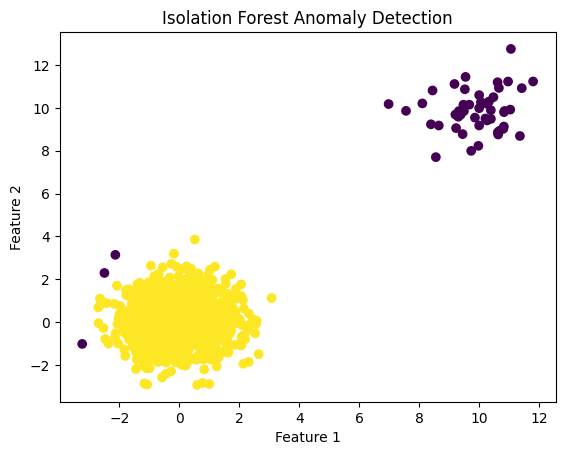

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
anomalies = np.random.normal(loc=10, scale=1, size=(50, 2))
data = np.vstack([normal_data, anomalies])

# Create and fit the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
model.fit(data)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = model.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))
anomalies = np.random.normal(loc=10, scale=1, size=(50, 2))
data = np.vstack([normal_data, anomalies])

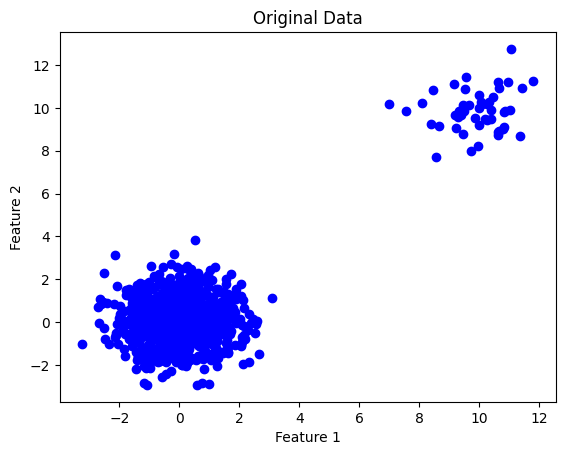

In [ ]:
# Plot original data
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Create and fit the Isolation Forest model
model_iforest = IsolationForest(contamination=0.05)
model_iforest.fit(data)

IsolationForest(contamination=0.05)

In [ ]:
# Predict anomalies with Isolation Forest
predictions_iforest = model_iforest.predict(data)

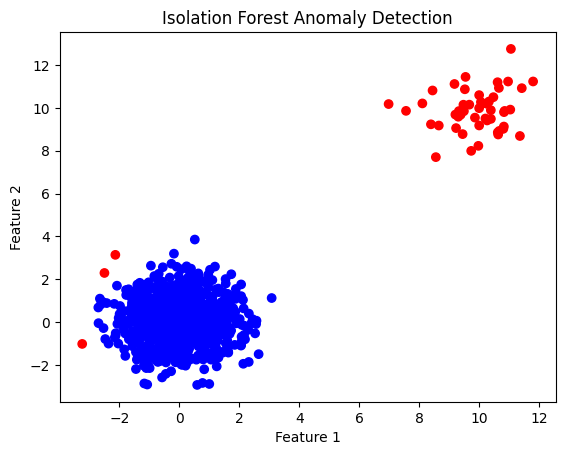

In [ ]:
# Visualize anomalies detected by Isolation Forest
plt.scatter(data[:, 0], data[:, 1], c=np.where(predictions_iforest == -1, 'red', 'blue'))
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Split data into training and testing sets
X_train, X_test, _, _ = train_test_split(data_scaled, data_scaled, test_size=0.2, random_state=42)

In [ ]:
# Build the autoencoder model
input_layer = Input(shape=(2,))
encoded = Dense(1, activation='relu')(input_layer)
decoded = Dense(2, activation='linear')(encoded)


In [ ]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 0.9601 - val_loss: 1.2254
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.9430 - val_loss: 1.2062
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.9302 - val_loss: 1.1924
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.9206 - val_loss: 1.1841
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.9140 - val_loss: 1.1776
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.9086 - val_loss: 1.1729
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.9043 - val_loss: 1.1698
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.9008 - val_loss: 1.1660
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.8971 - val_loss: 1.1628
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.8936 - val_loss: 1.1599
Epoch 11

In [ ]:
# Make predictions with the autoencoder
reconstructed_data = autoencoder.predict(data_scaled)

33/33 [==============================] - 0s 1ms/step


In [ ]:
# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(data_scaled - reconstructed_data), axis=1)

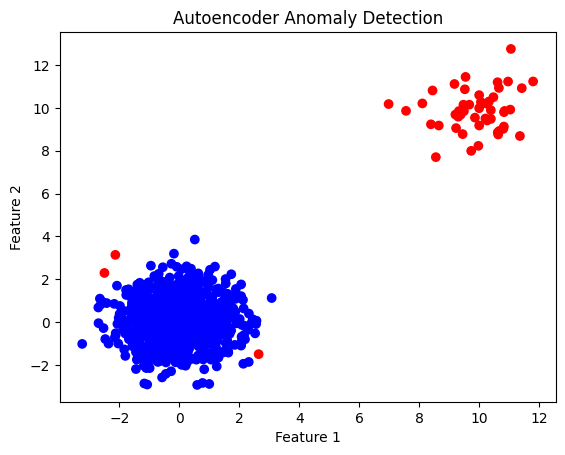

In [ ]:
# Visualize anomalies detected by the autoencoder
plt.scatter(data[:, 0], data[:, 1], c=np.where(reconstruction_errors > np.percentile(reconstruction_errors, 95), 'red', 'blue'))
plt.title('Autoencoder Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Generate synthetic data
normal_data = np.array([1.0, 1.2, 1.1, 0.9, 1.0, 1.2])
anomalous_data = np.array([3.0, 3.5, 2.8, 3.2, 3.1, 3.3])

# Create training data (normal data only)
X_train, X_test = train_test_split(normal_data, test_size=0.2, random_state=42)

# Build the autoencoder model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,), activation='linear'),  # Encoding layer
    keras.layers.Dense(units=1, activation='linear')  # Decoding layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
model.fit(X_train, X_train, epochs=1000, verbose=0)

# Evaluate the autoencoder on normal and anomalous data
normal_reconstructions = model.predict(X_test)
anomalous_reconstructions = model.predict(anomalous_data)

# Calculate reconstruction errors
normal_errors = np.mean(np.square(X_test - normal_reconstructions), axis=1)
anomalous_errors = np.mean(np.square(anomalous_data - anomalous_reconstructions), axis=1)

# Set a threshold for anomaly detection
threshold = 0.1

# Detect anomalies based on the threshold
normal_predictions = normal_errors < threshold
anomalous_predictions = anomalous_errors < threshold

# Print the results
print("Normal Data Reconstruction Errors:", normal_errors)
print("Anomalous Data Reconstruction Errors:", anomalous_errors)
print("\nAnomaly Detection:")
print("Normal Data Predictions:", normal_predictions)
print("Anomalous Data Predictions:", anomalous_predictions)


1/1 [==============================] - 0s 60ms/step
Normal Data Reconstruction Errors: [0.01478734 0.01037401]
Anomalous Data Reconstruction Errors: [1.57165787 1.0744609  1.79796769 1.36102252 1.46438095 1.2615834 ]

Anomaly Detection:
Normal Data Predictions: [ True  True]
Anomalous Data Predictions: [False False False False False False]
